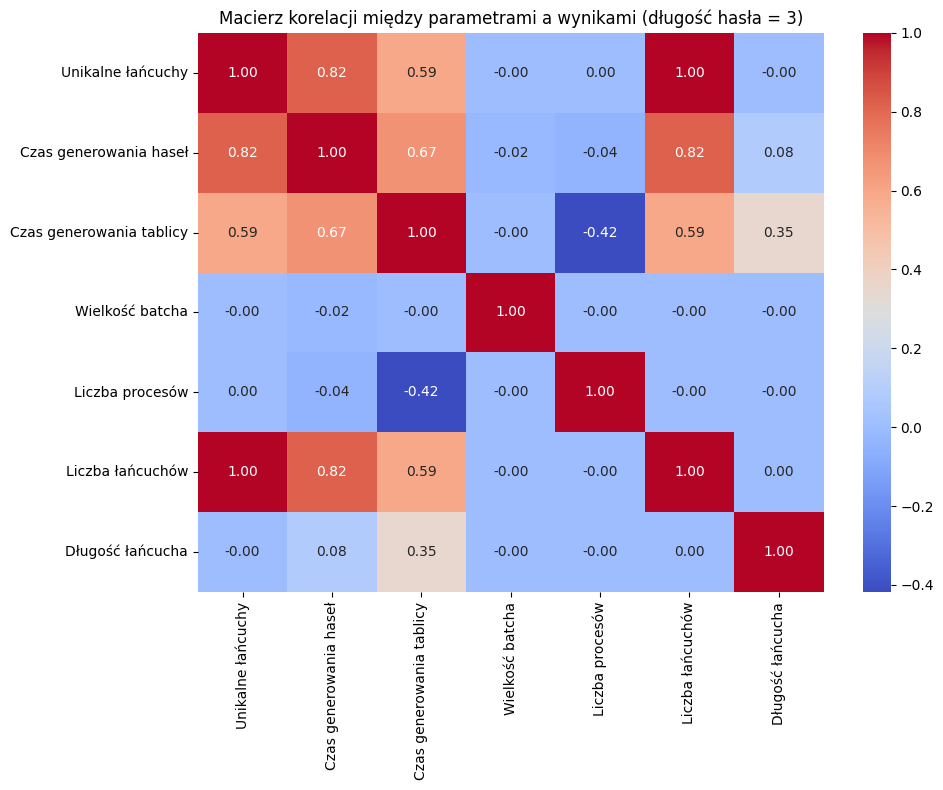

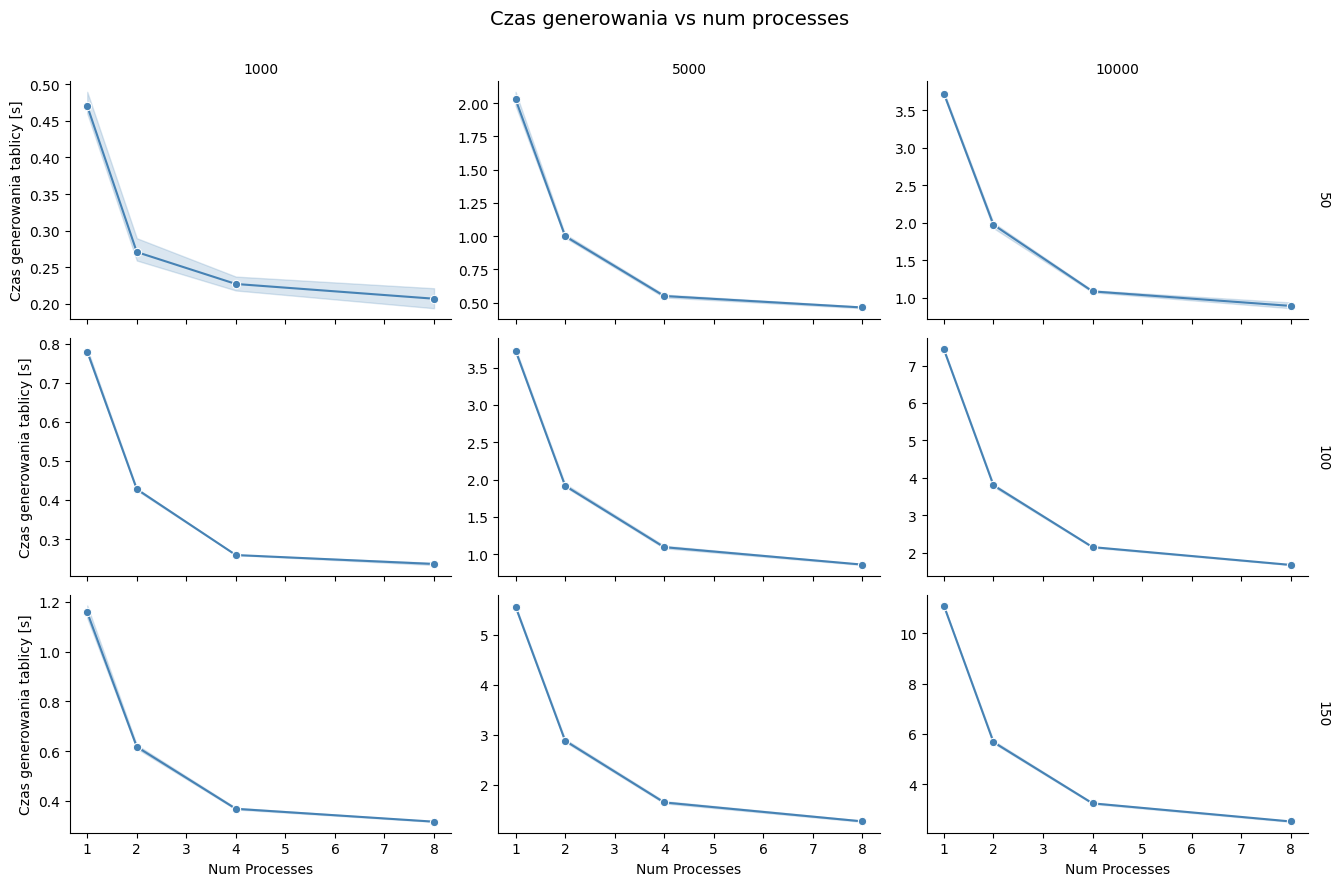

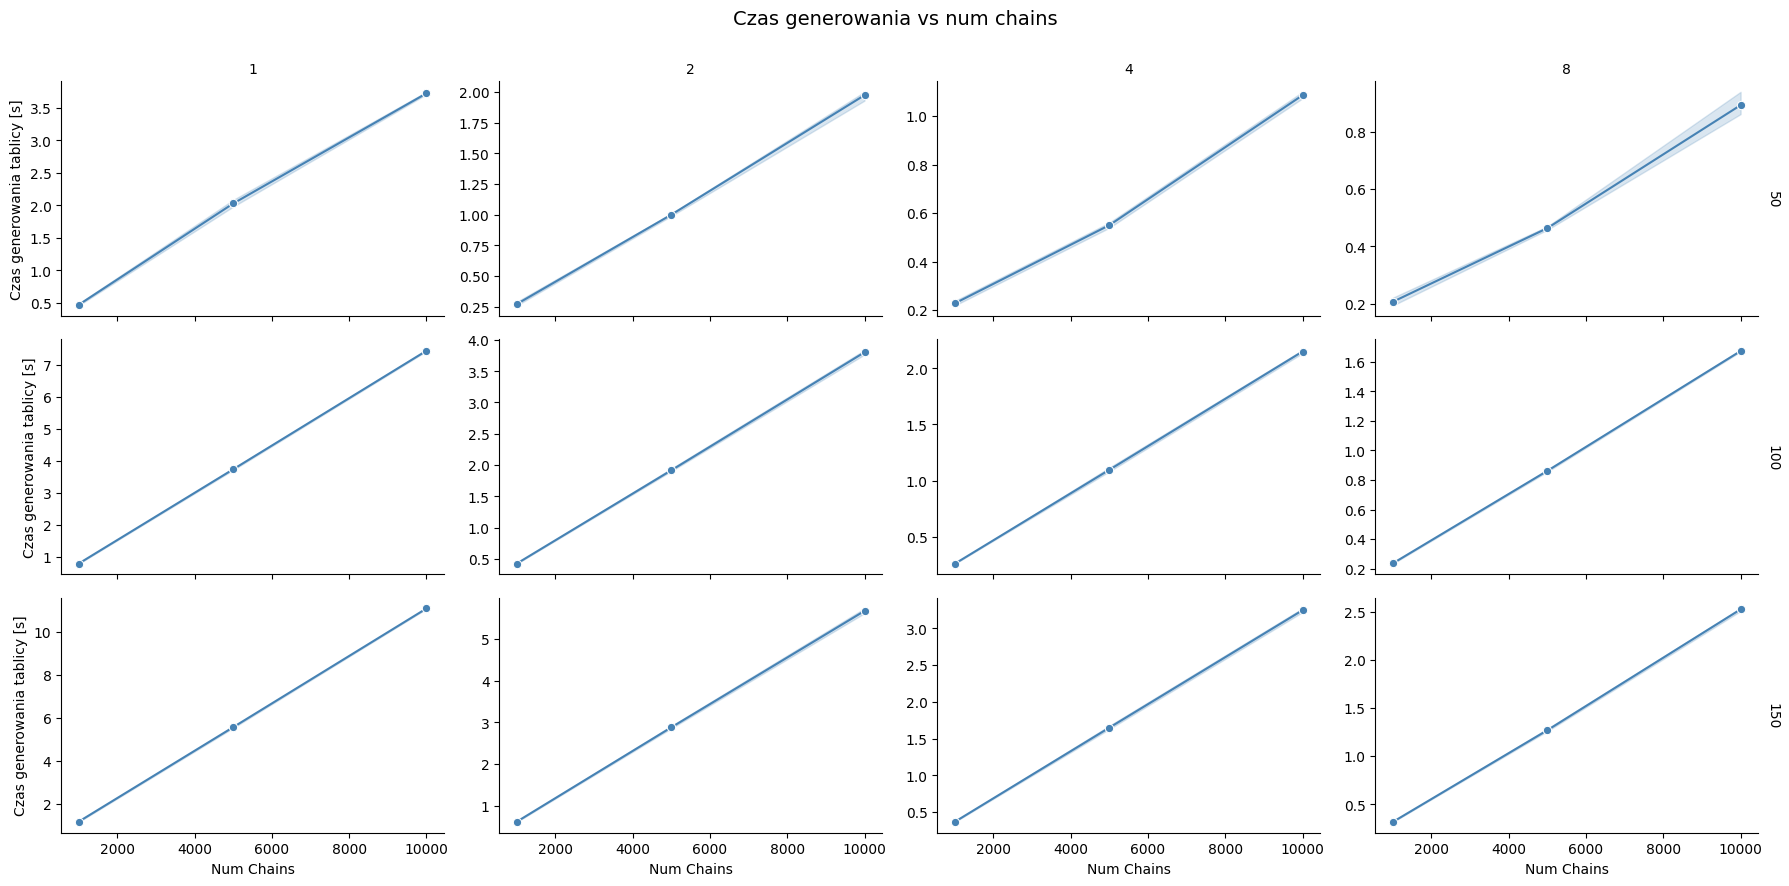

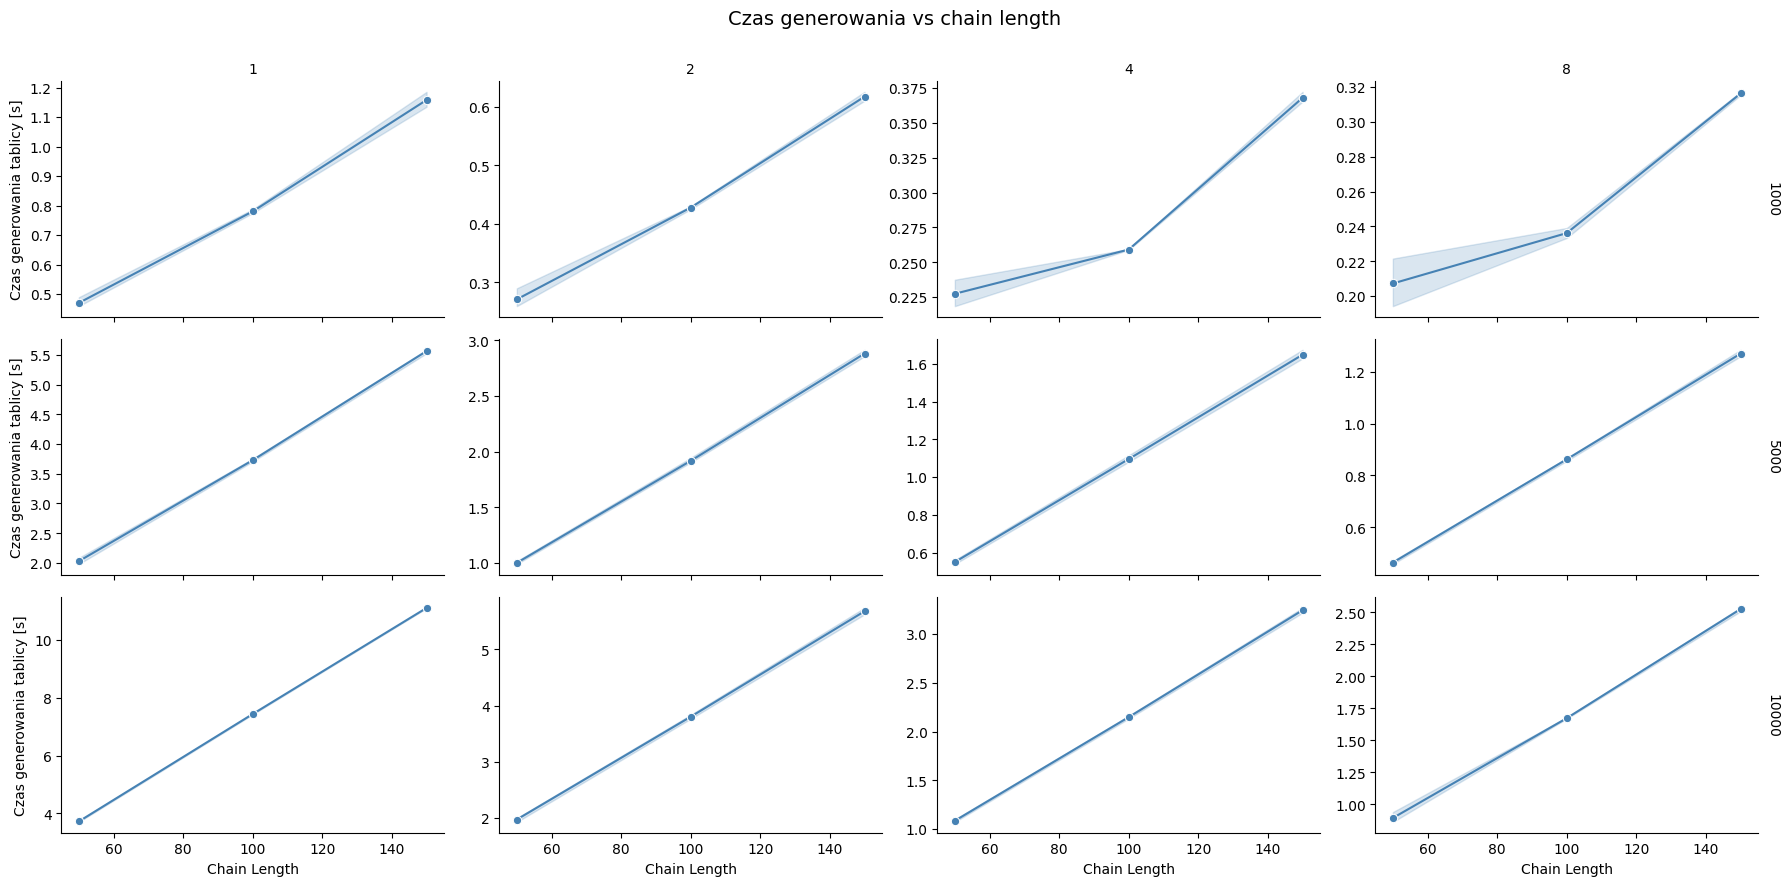


📌 5 najszybszych wyników (czas generowania tablicy):
    table_gen_time  num_processes  num_chains  chain_length  batch_size  \
9         0.194180              8        1000            50         250   
11        0.205884              8        1000            50        1000   
6         0.218419              4        1000            50         250   
10        0.221491              8        1000            50         500   
8         0.226113              4        1000            50        1000   

    uniqueness_percentage  
9                    99.3  
11                   98.9  
6                    98.5  
10                   99.1  
8                    99.0  

📌 5 najwolniejszych wyników (czas generowania tablicy):
    table_gen_time  num_processes  num_chains  chain_length  batch_size  \
96       11.103723              1       10000           150         250   
97       11.103349              1       10000           150         500   
98       11.082356              1       10000

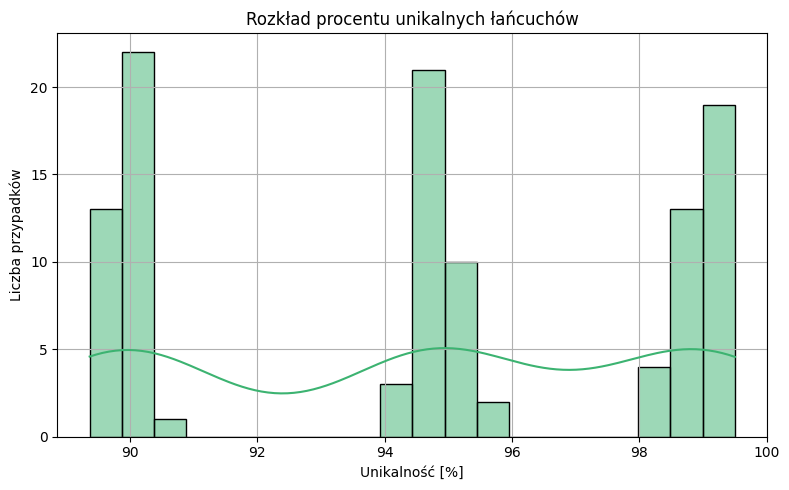

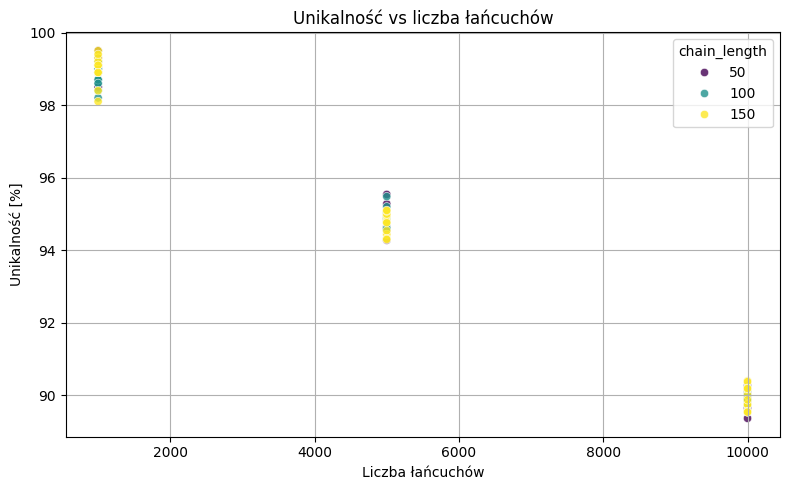

/var/folders/vq/6_fbqycs7zg12jsjsf679jpr0000gn/T/ipykernel_45588/3168261687.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="chain_length", y="uniqueness_percentage", palette="Set2")


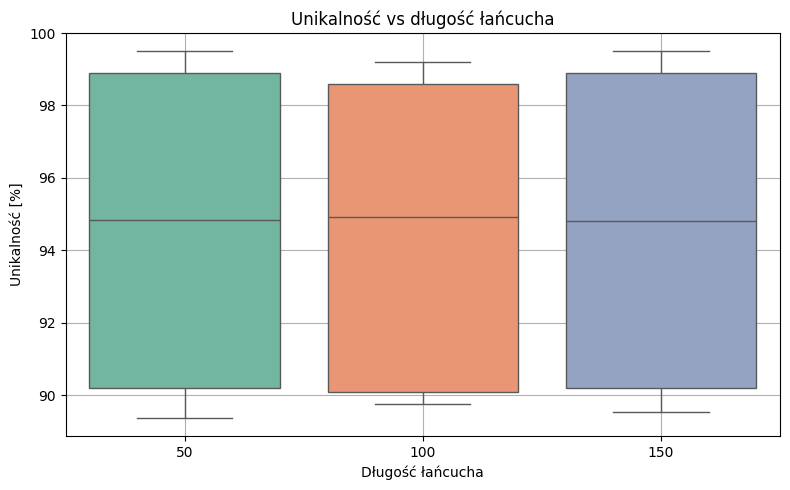


📌 Najlepsze tablice do testowania crackingu (unikalność ≥ 98.0%, czas ≤ 1.13s):


,table_file,uniqueness_percentage,table_gen_time,num_chains,chain_length,num_processes,batch_size
1,benchmark_tables3/table_p3_c50_n1000_proc1_b50...,99.5,0.459314,1000,50,1,500
81,benchmark_tables3/table_p3_c150_n1000_proc8_b2...,99.4,0.316315,1000,150,8,250
9,benchmark_tables3/table_p3_c50_n1000_proc8_b25...,99.3,0.194180,1000,50,8,250
75,benchmark_tables3/table_p3_c150_n1000_proc2_b2...,99.3,0.625312,1000,150,2,250
47,benchmark_tables3/table_p3_c100_n1000_proc8_b1...,99.2,0.233327,1000,100,8,1000
80,benchmark_tables3/table_p3_c150_n1000_proc4_b1...,99.2,0.366458,1000,150,4,1000
2,benchmark_tables3/table_p3_c50_n1000_proc1_b10...,99.2,0.489468,1000,50,1,1000
10,benchmark_tables3/table_p3_c50_n1000_proc8_b50...,99.1,0.221491,1000,50,8,500
7,benchmark_tables3/table_p3_c50_n1000_proc4_b50...,99.1,0.237373,1000,50,4,500
82,benchmark_tables3/table_p3_c150_n1000_proc8_b5...,99.1,0.315417,1000,150,8,500


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Wczytaj plik CSV z wynikami (ścieżka względem katalogu notebooka)
df = pd.read_csv("../benchmark_results_3.csv")

# Wybierz kolumny istotne do analizy korelacji
kolumny_korelacyjne = [
    "unique_chains", "password_gen_time", "table_gen_time",
    "batch_size", "num_processes", "num_chains", "chain_length"
]

# Zmień nazwy kolumn na bardziej czytelne (opcjonalnie)
df_renamed = df[kolumny_korelacyjne].rename(columns={
    "unique_chains": "Unikalne łańcuchy",
    "password_gen_time": "Czas generowania haseł",
    "table_gen_time": "Czas generowania tablicy",
    "batch_size": "Wielkość batcha",
    "num_processes": "Liczba procesów",
    "num_chains": "Liczba łańcuchów",
    "chain_length": "Długość łańcucha"
})

# Oblicz macierz korelacji
macierz_korelacji = df_renamed.corr(numeric_only=True)

# Wizualizacja jako heatmapa
plt.figure(figsize=(10, 8))
sns.heatmap(macierz_korelacji, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Macierz korelacji między parametrami a wynikami (długość hasła = 3)")
plt.tight_layout()
plt.show()

# 🧩 Lista parametrów, które chcemy przeanalizować
parametry_x = ["num_processes", "num_chains", "chain_length"]

# 🔁 Generujemy wykresy dla każdego parametru osobno
for parametr in parametry_x:
    # Kolumny do podziału (wszystkie inne poza aktualnym parametrem)
    pozostałe = [col for col in parametry_x if col != parametr]

    # Tworzymy siatkę wykresów
    g = sns.FacetGrid(
        df,
        col=pozostałe[0],
        row=pozostałe[1],
        margin_titles=True,
        sharey=False,
        height=3,
        aspect=1.5
    )
    g.map_dataframe(
        sns.lineplot,
        x=parametr,
        y="table_gen_time",
        marker="o",
        color="steelblue"
    )

    g.set_axis_labels(parametr.replace("_", " ").title(), "Czas generowania tablicy [s]")
    g.set_titles(row_template="{row_name}", col_template="{col_name}")
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(f"Czas generowania vs {parametr.replace('_', ' ')}", fontsize=14)
    plt.show()

    # 📊 TOP 5 – najszybsze generowanie tablicy
print("\n📌 5 najszybszych wyników (czas generowania tablicy):")
print(df.nsmallest(5, "table_gen_time")[[
    "table_gen_time", "num_processes", "num_chains", "chain_length", "batch_size", "uniqueness_percentage"
]])

# 📊 BOTTOM 5 – najwolniejsze generowanie tablicy
print("\n📌 5 najwolniejszych wyników (czas generowania tablicy):")
print(df.nlargest(5, "table_gen_time")[[
    "table_gen_time", "num_processes", "num_chains", "chain_length", "batch_size", "uniqueness_percentage"
]])

# 📈 Histogram unikalności
plt.figure(figsize=(8, 5))
sns.histplot(df["uniqueness_percentage"], bins=20, kde=True, color="mediumseagreen")
plt.title("Rozkład procentu unikalnych łańcuchów")
plt.xlabel("Unikalność [%]")
plt.ylabel("Liczba przypadków")
plt.grid(True)
plt.tight_layout()
plt.show()

# 🧩 Zależność unikalności od liczby łańcuchów
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="num_chains", y="uniqueness_percentage", hue="chain_length", palette="viridis", alpha=0.8)
plt.title("Unikalność vs liczba łańcuchów")
plt.xlabel("Liczba łańcuchów")
plt.ylabel("Unikalność [%]")
plt.grid(True)
plt.tight_layout()
plt.show()

# 🧩 Zależność unikalności od długości łańcucha
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="chain_length", y="uniqueness_percentage", palette="Set2")
plt.title("Unikalność vs długość łańcucha")
plt.xlabel("Długość łańcucha")
plt.ylabel("Unikalność [%]")
plt.grid(True)
plt.tight_layout()
plt.show()


# 📌 Filtrujemy tylko dobre tablice
# Warunki: unikalność ≥ 98% oraz czas generowania < mediany
min_uniqueness = 98.0
czas_median = df["table_gen_time"].median()

najlepsze_tablice = df[
    (df["uniqueness_percentage"] >= min_uniqueness) &
    (df["table_gen_time"] <= czas_median)
].sort_values(by=["uniqueness_percentage", "table_gen_time"], ascending=[False, True])

# 🧾 Wyświetlamy najlepsze tablice
print(f"\n📌 Najlepsze tablice do testowania crackingu (unikalność ≥ {min_uniqueness}%, czas ≤ {czas_median:.2f}s):")
display(najlepsze_tablice[[
    "table_file", "uniqueness_percentage", "table_gen_time",
    "num_chains", "chain_length", "num_processes", "batch_size"
]].head(10))  # możesz zmienić .head(N) na .to_csv("...") lub .to_dict()


